<a href="https://colab.research.google.com/github/bilalrahim/Machine-Learning/blob/main/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Outlier Detection**




In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
corpus = pd.read_csv('/content/drive/My Drive/Data Sets/Mall_customers.xls')

#1.  Univariate
#1.1 Anamoly Detection  

In [ ]:
#Understanding Data Set
corpus[:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Plotting income and users to get a better idea of the data.
%matplotlib inline

from matplotlib import pyplot as plt 

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 8 Text major ticklabel objects>)

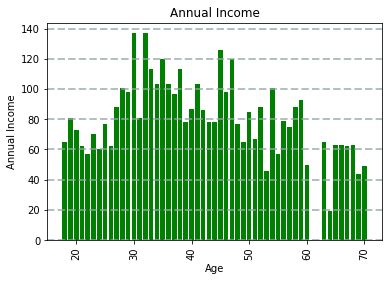

In [ ]:
#Creating a bar plot of age vs income

plt.bar(x = corpus.iloc[:,2], height=corpus.iloc[:,3], color = 'green')
plt.title('Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# ##1.1.1 Checking Missing Values

In [ ]:
corpus.isnull().sum()
#No missing Value in the data set

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##1.1.2 Checking for noise values.
**Method used**

*   Median.
*   Global Context



In [ ]:
#For first column "gender". 
#Checking if there is a label other than male or female.

set(corpus.iloc[:,1])

#Only two labels throughout the dataset, seems okay.

{'Female', 'Male'}

In [ ]:
#For second column "age".
#Checking first if noise values exist.

#Finding range of normality.
age_median = corpus.iloc[:,2].median()
K = 2
cutoff = K * age_median

min_age = corpus.iloc[:,2].min()
max_age = corpus.iloc[:,2].max()
print("Range of Normality : { -", cutoff," , ",cutoff," } ")
print("Min age : ", min_age)
print("Max age : ", max_age)
#Between 70 and 18 seems okay.

Range of Normality : { - 72.0  ,  72.0  } 
Min age :  18
Max age :  70


In [ ]:
#For third column "anual income"
#Checking if noise values exist.
#Finding range of normality.

income_median = corpus.iloc[:,3].median()
K = 2
cutoff = K * income_median

min_income = corpus.iloc[:,3].min()
max_income = corpus.iloc[:,3].max()

print("Range of Normality : { -", cutoff," , ",cutoff," } ")
print("Min income : ", min_income)
print("Max income : ", max_income)

Range of Normality : { - 123.0  ,  123.0  } 
Min income :  15
Max income :  137


In [ ]:
#Outliers found, all values greater than 123k
#Saving them, for future.
outliers_income  = corpus[corpus.iloc[:,3] > 123]
outliers_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

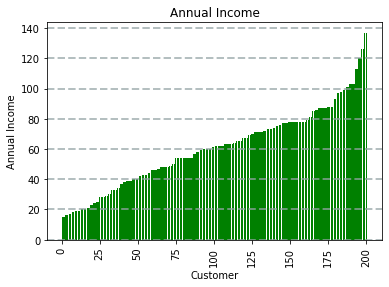

In [ ]:
#Creating a bar plot of Customer vs income

plt.bar(x = corpus.iloc[:,0], height=corpus.iloc[:,3], color = 'green')
plt.title('Annual Income')
plt.xlabel('Customer')
plt.ylabel('Annual Income')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

#Still seams okay.

In [ ]:
#Last column Spending Score.
#For third column "anual income"
#Checking if noise values exist.

#Finding range of normality.
score_median = corpus.iloc[:,-1].median()
K = 2
cutoff = K * score_median


min_score = corpus.iloc[:,-1].min()
max_score = corpus.iloc[:,-1].max()

print("Range of Normality : { -", cutoff," , ",cutoff," } ")
print("Min score : ", min_score)
print("Max score : ", max_score)

Range of Normality : { - 100.0  ,  100.0  } 
Min score :  1
Max score :  99


#2.1 Handling Anomaly

In [ ]:
#Noise values were found in "annual income" column in previous section.

outliers_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#Handling with statistical measure.
#Using Median.
#Finding median of values without the outliers.

median_income = corpus[corpus.iloc[:,3] < 123]
median_income = median_income.iloc[:,3].median()
median_income

60.5

In [ ]:
#Found the median, now replacing the noise values with median.
corpus['Annual Income (k$)'] = corpus['Annual Income (k$)'].replace([126,137],[60.5,60.5])

In [ ]:
corpus[corpus.iloc[:,3] > 123]

#All the outliers value in the dataset has been replaced by the median value.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


#2 Multivariate 

#2.1 Detection

In [ ]:
#Using LOF.

data = corpus.iloc[: , 2 : 5].values
data[:3]

array([[19., 15., 39.],
       [21., 15., 81.],
       [20., 16.,  6.]])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor()

In [ ]:
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

#2.2 Removal

In [ ]:
#5th value from the bottom seems to be an outlier
#Removing the row.

corpus[-6:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
194,195,Female,47,120.0,16
195,196,Female,35,120.0,79
196,197,Female,45,60.5,28
197,198,Male,32,60.5,74
198,199,Male,32,60.5,18
199,200,Male,30,60.5,83


In [ ]:
corpus = corpus.drop(corpus.index[-5])

In [ ]:
corpus[-6:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
193,194,Female,38,113.0,91
194,195,Female,47,120.0,16
196,197,Female,45,60.5,28
197,198,Male,32,60.5,74
198,199,Male,32,60.5,18
199,200,Male,30,60.5,83
